@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/2J90FG6QKL4
<br>
<h1 style="color:purple">Datos Desbalanceados</h1>
<h2 style="color:purple">Sub- y sobre-muestreo</h2>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

# Código de soporte 

def matriz_de_confusion(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión """
    print("Reales:", clases_reales.reshape(-1))
    print("Predichas:", clases_predichas)
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Sana", "1 : Cáncer"])
    plt.matshow(matriz, cmap="Pastel1", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()

<h1 style="color:purple">Datos de Cáncer de Mama</h1>
<h2 style="color:purple">Distribución de Clases (Desbalanceadas)</h2>

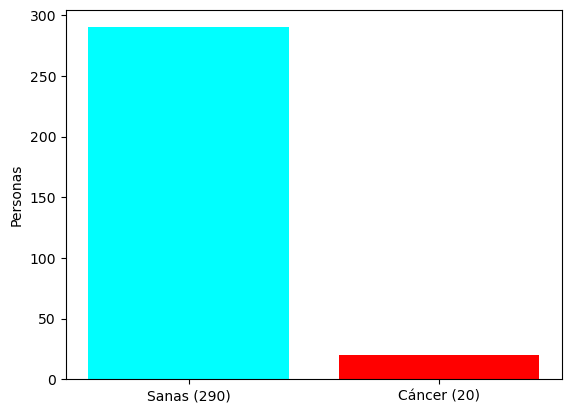

In [2]:
# University of Wisconsin, Clinical Sciences Center 
# 30 características: radio, textura, area, entre otros
# 0 : SANAS, 1 : CÁNCER
personas = pd.read_csv("cancer_desbalance.csv", header=None)
prueba = pd.read_csv("cancer_prueba.csv", header=None)

# Gráficas de barras
num_sanas = personas[personas[30]==0][0].size
num_cancer = personas[personas[30]==1][0].size
plt.bar(["Sanas (%d)" % num_sanas, "Cáncer (%d)" % num_cancer], 
        [num_sanas, num_cancer],
        color =["cyan", "red"],
        width = 0.8)
plt.ylabel("Personas")
plt.show()

<h1 style="color:purple"> Separando los datos por Clase</h1>

In [3]:
datos_cancer = personas[personas[30]==1]
datos_sanas = personas[personas[30]==0]

<h2 style="color:purple"> Sobremuestreo con Remplazo</h2>

In [4]:
sobremuestreo_cancer = datos_cancer.sample(n=290, replace=True, random_state=0)
sobremuestreo_cancer

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
12,0.5269,0.7602,0.5137,0.3555,0.4274,0.4702,0.4133,0.4910,0.3880,0.1907,...,0.8911,0.4731,0.3077,0.4682,0.3832,0.5111,0.7505,0.4316,0.3806,1.0
15,0.4941,0.7237,0.4710,0.3340,0.4184,0.3846,0.2451,0.3808,0.4355,0.2714,...,0.7550,0.5064,0.3595,0.6033,0.2384,0.2108,0.5924,0.4432,0.3789,1.0
0,0.4163,0.4257,0.4095,0.2550,0.5721,0.5743,0.4603,0.5396,0.5163,0.3738,...,0.5843,0.4566,0.2885,0.6584,0.3997,0.4435,0.8080,0.4975,0.4999,1.0
3,0.5386,0.4544,0.5172,0.3598,0.4601,0.4660,0.2924,0.5224,0.5538,0.2245,...,0.4499,0.4367,0.2860,0.5232,0.3802,0.2637,0.7520,0.4586,0.3193,1.0
3,0.5386,0.4544,0.5172,0.3598,0.4601,0.4660,0.2924,0.5224,0.5538,0.2245,...,0.4499,0.4367,0.2860,0.5232,0.3802,0.2637,0.7520,0.4586,0.3193,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.6908,0.4485,0.6590,0.5262,0.3991,0.4119,0.3827,0.6838,0.2935,0.1343,...,0.6737,0.5866,0.4514,0.4458,0.3106,0.3514,0.8686,0.2155,0.2039,1.0
17,0.5195,0.5651,0.5255,0.3550,0.3635,0.7599,0.5200,0.5933,0.3779,0.5121,...,0.5662,0.4641,0.3077,0.3364,0.4955,0.4125,0.7604,0.2256,0.7195,1.0
0,0.4163,0.4257,0.4095,0.2550,0.5721,0.5743,0.4603,0.5396,0.5163,0.3738,...,0.5843,0.4566,0.2885,0.6584,0.3997,0.4435,0.8080,0.4975,0.4999,1.0
11,0.5406,0.2963,0.5151,0.3591,0.3326,0.4358,0.2653,0.3703,0.3922,0.1606,...,0.3360,0.4128,0.2720,0.3744,0.2628,0.3427,0.5848,0.3917,0.2895,1.0


<h2 style="color:purple"> Submuestreo sin Remplazo</h2>

In [5]:
submuestreo_sanas = datos_sanas.sample(n=20, replace=False, random_state=0)
submuestreo_sanas

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
75,0.0854,0.2539,0.0842,0.0371,0.5631,0.2629,0.1006,0.1139,0.3500,0.5704,...,0.2554,0.0701,0.0244,0.6876,0.2296,0.1962,0.4000,0.4174,0.4978,0.0
144,0.3449,0.4788,0.3214,0.1951,0.3437,0.2102,0.0356,0.1123,0.2715,0.1727,...,0.6136,0.2384,0.1303,0.3907,0.1362,0.0498,0.3034,0.2026,0.2244,0.0
201,0.2876,0.1498,0.2727,0.1533,0.5486,0.2895,0.0925,0.2013,0.2870,0.3145,...,0.3044,0.2111,0.1018,0.5673,0.2150,0.1431,0.4400,0.2505,0.3247,0.0
230,0.2827,0.3788,0.2661,0.1498,0.3984,0.2525,0.0654,0.1054,0.4153,0.2497,...,0.4694,0.1863,0.0970,0.3982,0.1720,0.1002,0.3166,0.3616,0.1839,0.0
291,0.2451,0.6299,0.2363,0.1263,0.4547,0.3056,0.1324,0.2530,0.4516,0.3973,...,0.6163,0.1697,0.0808,0.4071,0.1701,0.1285,0.4579,0.3171,0.2923,0.0
65,0.2544,0.4485,0.2336,0.1337,0.2483,0.0882,0.0580,0.1048,0.4034,0.1378,...,0.6996,0.1702,0.0891,0.2794,0.0674,0.0915,0.2831,0.3462,0.1453,0.0
294,0.2392,0.4909,0.2309,0.1224,0.1219,0.3653,0.2137,0.1413,0.1717,0.3446,...,0.5430,0.1648,0.0791,0.1589,0.3433,0.2570,0.3333,0.2268,0.4745,0.0
232,0.3141,0.3004,0.2913,0.1734,0.2414,0.1578,0.0531,0.0872,0.3506,0.1431,...,0.3253,0.2159,0.1176,0.3405,0.1541,0.1089,0.2662,0.3607,0.2207,0.0
35,0.3185,0.5224,0.3013,0.1771,0.3150,0.2418,0.1157,0.2004,0.4450,0.1469,...,0.6653,0.2420,0.1262,0.3058,0.1579,0.1823,0.4884,0.4006,0.1495,0.0
42,0.1560,0.2145,0.1451,0.0714,0.5486,0.2570,0.0264,0.0764,1.0000,0.4216,...,0.1825,0.0969,0.0451,0.3826,0.0784,0.0173,0.0982,0.6111,0.2676,0.0


<h2 style="color:purple"> Preparando los datos para tres clasificadores</h2>

In [6]:
sobremuestro = pd.concat([sobremuestreo_cancer, datos_sanas])
datos_sobremuestreo = sobremuestro.iloc[:, :-1]
clase_sobremuestreo = sobremuestro.iloc[:, -1:]

submuestreo = pd.concat([datos_cancer, submuestreo_sanas])
datos_submuestreo = submuestreo.iloc[:, :-1]
clase_submuestreo = submuestreo.iloc[:, -1:]

desbalanceado = pd.concat([datos_cancer, datos_sanas])
datos_desbalanceado = desbalanceado.iloc[:, :-1]
clase_desbalanceado = desbalanceado.iloc[:, -1:]

# Datos para probar los modelos (son solo 20 instancias)
datos_prueba = prueba.iloc[:, :-1]
clase_prueba = prueba.iloc[:, -1:]


<h2 style="color:purple"> Creación y Evaluación de 3 Modelos
<h2 style="color:purple">Regresión Logística</h2>


Reales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predichas: [0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


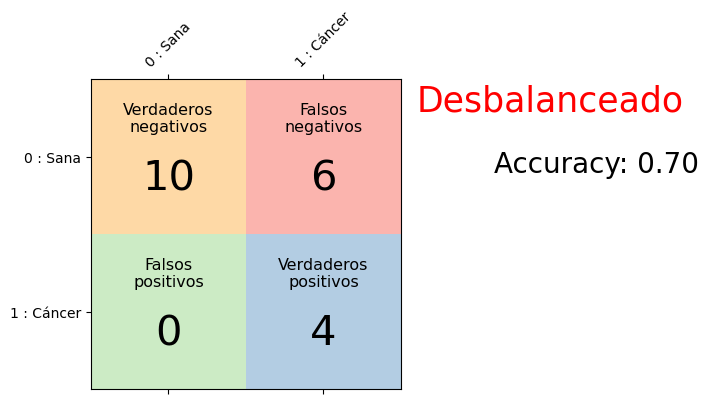

Reales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predichas: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


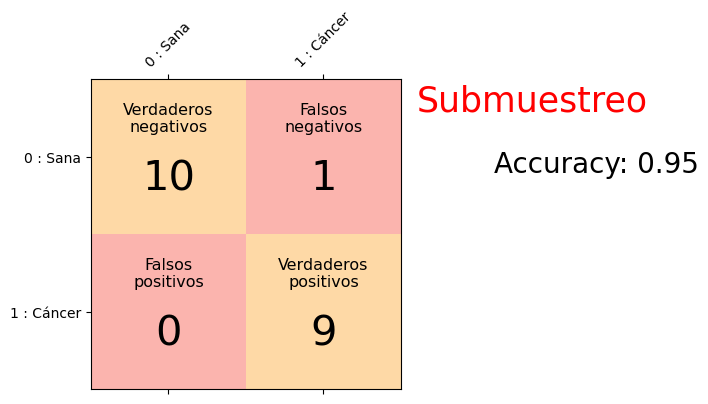

Reales: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predichas: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


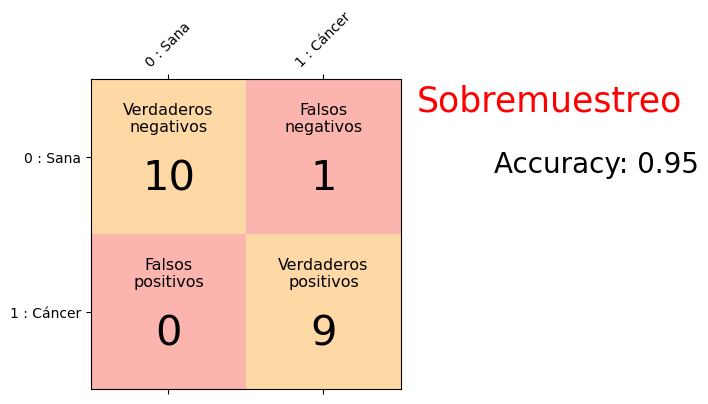

In [7]:
modelo = LogisticRegression().fit(datos_desbalanceado.values, 
                                  clase_desbalanceado.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Desbalanceado") 

modelo = LogisticRegression().fit(datos_submuestreo.values, 
                                  clase_submuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Submuestreo") 

modelo = LogisticRegression().fit(datos_sobremuestreo.values, 
                                  clase_sobremuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Sobremuestreo") 